In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.utils import shuffle
import seaborn as sns
from sklearn import datasets
import random
import math
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("unemployment_data_us.csv", encoding='utf-8')
df=df.drop(["Date","White","Afro-American","Asian","Hispanic","Month"],axis=1)
df.head()
# we kept only rows in the DataFrame where the value in the year is less than or equal to 2016
df = df[df['Year'] <= 2016]
# Group the DataFrame by the "Year" column and calculate the mean of each group
df = df.groupby(['Year'],as_index=False).agg('mean')

df2 = pd.read_csv("usa_inflation.csv", encoding='utf-8')
df2 = df2[df2['Year'] <= 2016]# we kept only rows in the DataFrame where the value in the year is less than or equal to 2019
df2=df2[df2["Year"]>=2010]# we kept only rows in the DataFrame where the value in the year is greater than or equal to 2010
df2=df2[df2["Country Code"]=="USA"]# we kept only rows in the DataFrame where the value in the country is "usa
df.head(40)

,Year,Primary_School,High_School,Associates_Degree,Professional_Degree,Men,Women
0,2010,14.841667,10.291667,8.383333,4.708333,9.816667,8.033333
1,2011,14.075000,9.425000,7.966667,4.308333,8.700000,7.916667
2,2012,12.391667,8.308333,7.100000,4.025000,7.525000,7.341667
3,2013,10.958333,7.508333,6.366667,3.700000,6.975000,6.533333
4,2014,9.016667,6.008333,5.425000,3.175000,5.708333,5.591667
5,2015,7.941667,5.441667,4.508333,2.566667,4.908333,4.775000
6,2016,7.433333,5.191667,4.083333,2.508333,4.508333,4.408333


<AxesSubplot: >

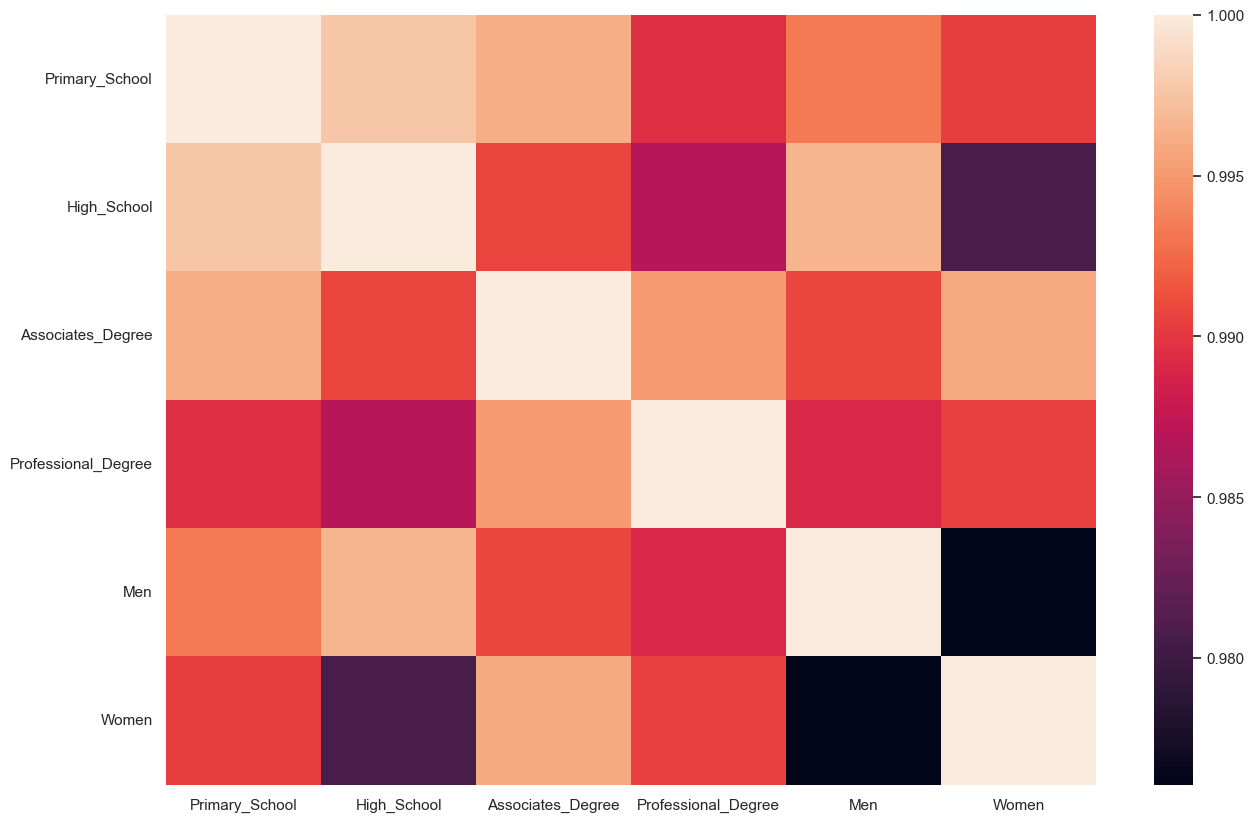

In [9]:
pearson = df.drop("Year",axis=1)# we created a new DataFrame called pearson by dropping the year from the df
sns.heatmap(pearson.corr())# we created a heatmap using the "pearson" DataFrame

EDUCATIONAL SPECIFICATION


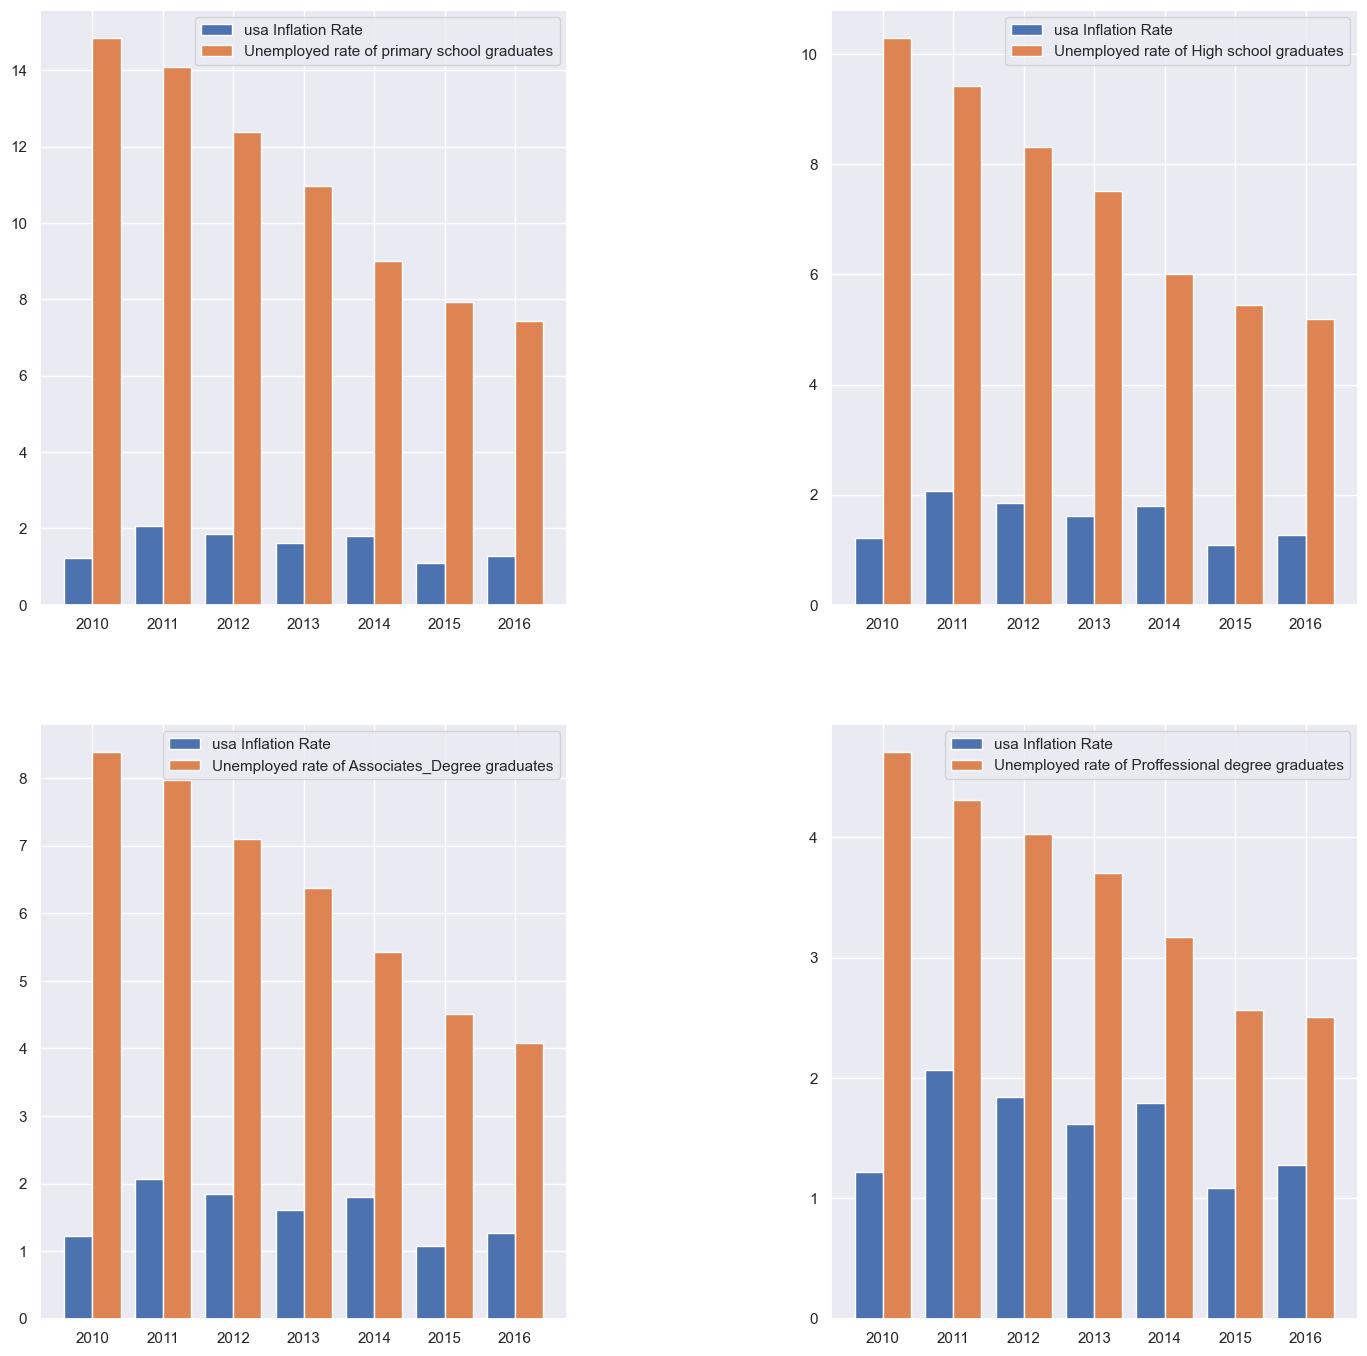

In [10]:
print("EDUCATIONAL SPECIFICATION")
no_of_rows = 2 # rows of your subplots
no_of_cols = 2 # columns of your subplots


plt.subplots(no_of_rows, no_of_cols, figsize=(17,17))#creates a subplot with the specified number of rows and columns and a specified figure size
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=.2)#adjusts the space between subplots

plt.subplot(2,2,1)#2x2 subplots first plot

x_axis = np.arange(len(df2))#creates an array of values from 0 to the length of df2 for the x-axis

plt.bar(x_axis -0.2, df2["InflationRate"], width=0.4, label = 'usa Inflation Rate')
plt.bar(x_axis +0.2, df["Primary_School"], width=0.4, label = 'Unemployed rate of primary school graduates')#primary school rates
plt.xticks(x_axis, df2["Year"])
plt.legend()

#2x2 subplots second plot
plt.subplot(2,2,2)
#plots two bar plots on the same axis, with the x-axis as the years in df2 and the y-axis as the values in df2 and df for InflationRate and High School respectively
plt.bar(x_axis -0.2, df2["InflationRate"], width=0.4, label = 'usa Inflation Rate')
plt.bar(x_axis +0.2, df["High_School"], width=0.4, label = 'Unemployed rate of High school graduates')#high school rates
plt.xticks(x_axis, df2["Year"])
plt.legend()

#2x2 subplots third plot
plt.subplot(2,2,3)
plt.bar(x_axis -0.2, df2["InflationRate"], width=0.4, label = 'usa Inflation Rate')
plt.bar(x_axis +0.2, df["Associates_Degree"], width=0.4, label = 'Unemployed rate of Associates_Degree graduates')#Associates_Degree school rates
plt.xticks(x_axis, df2["Year"])
plt.legend()

#2x2 subplots fourth plot
plt.subplot(2,2,4)
plt.bar(x_axis -0.2, df2["InflationRate"], width=0.4, label = 'usa Inflation Rate')
plt.bar(x_axis +0.2, df["Professional_Degree"], width=0.4, label = 'Unemployed rate of Proffessional degree graduates')#Professional_Degree school rates
plt.xticks(x_axis, df2["Year"])
plt.legend()
plt.show()

GENDER SPECIFICATION


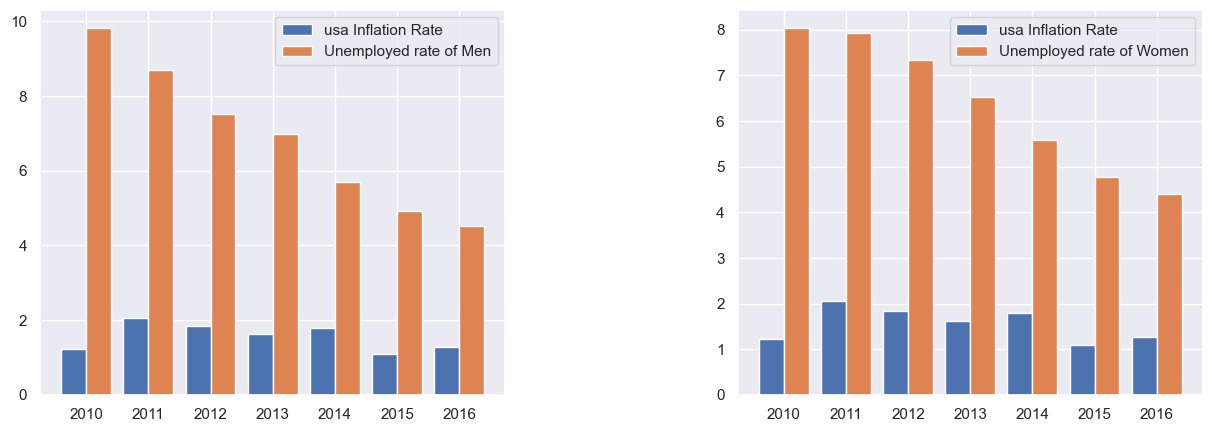

In [11]:
print("GENDER SPECIFICATION")

no_of_rows = 2 # rows of your subplots
no_of_cols = 2 # columns of your subplots

plt.subplots(no_of_rows, no_of_cols, figsize=(15,5))# here we used subplots to collect our plots as one to see differences between unemployed people whose education level is differs eachother.
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=.05)

plt.subplot(1,2,1)#1x2 subplots first plot

x_axis = np.arange(len(df2))

plt.bar(x_axis -0.2, df2["InflationRate"], width=0.4, label = 'usa Inflation Rate')
plt.bar(x_axis +0.2, df["Men"], width=0.4, label = 'Unemployed rate of Men')
plt.xticks(x_axis, df2["Year"])
plt.legend()


plt.subplot(1,2,2)#1x2 subplots second plot

plt.bar(x_axis -0.2, df2["InflationRate"], width=0.4, label = 'usa Inflation Rate')
plt.bar(x_axis +0.2, df["Women"], width=0.4, label = 'Unemployed rate of Women')
plt.xticks(x_axis, df2["Year"])
plt.legend()

Text(0.5, 77.24999999999999, 'Year')

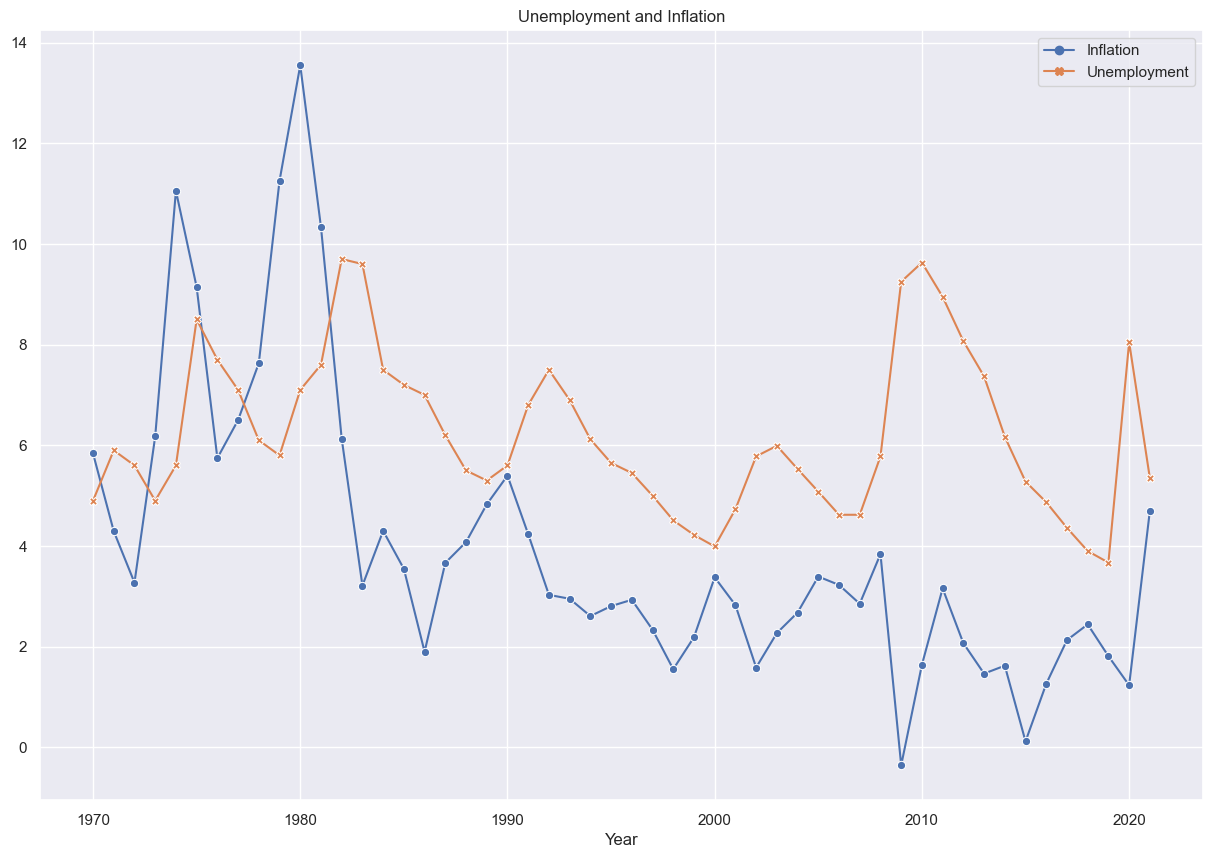

In [12]:
df3= pd.read_csv("interest_inf_unem.csv", encoding='utf-8')#here we used another dataframe to visualize unemployement and iflation trend over the years
dfx=df3.loc[df3['country'] == 'United States'][['year','Inflation, consumer prices (annual %)','Unemployment, total (% of total labor force) (national estimate)']]#here we filtered our data by 'year','Inflation, consumer prices (annual %)','Unemployment, total (% of total labor force) (national estimate)' for United States
# The column names are then modified and the 'Year' column is set as the index.
dfx.rename(columns = {'Inflation, consumer prices (annual %)':'Inflation','Unemployment, total (% of total labor force) (national estimate)':'Unemployment', 'year':'Year'},inplace=True)#renamed the lines
dfx.set_index('Year',inplace=True)
dfx.head()
# A line plot is created using the seaborn library, showing the 'Inflation' and 'Unemployment' data over time.
# The plot is given a title and x-axis label.
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(data = dfx,markers=True,dashes=False)
ax.set_title('Unemployment and Inflation')
plt.savefig('testplot.png')
ax.set_xlabel('Year')